In [1]:
import torch
from torch import nn
import  matplotlib.pyplot as plt


# check the python version
torch.__version__

'2.2.1+cu118'

## 1. Data(preparing and loading)


Data can almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songsand podcasts
* DNA
* Text

Machine learning is a goame of two parts:

1. Get data inot a numerical representation
2. Build a model to learn a patters in that numerical  model

To showcase this, let's create some *known* data using the linear regression formula

we'll use  a linear regression formula to make a straigth line with known **parameters**



In [2]:
# Create *Knowns* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight* X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Spliting data into training and test sets (one of the most important concept in machine learning)

Let's create a training and testing sets with our data


In [4]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                    train_labels = y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):


    """
    Plosts trainig data, test data and copare predictions
    """
    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Trainig data")

    # Plot test data in greeen
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r",s=4, label="Predictions")
    
    # show the legend
    plt.legend(prop={"size":14})


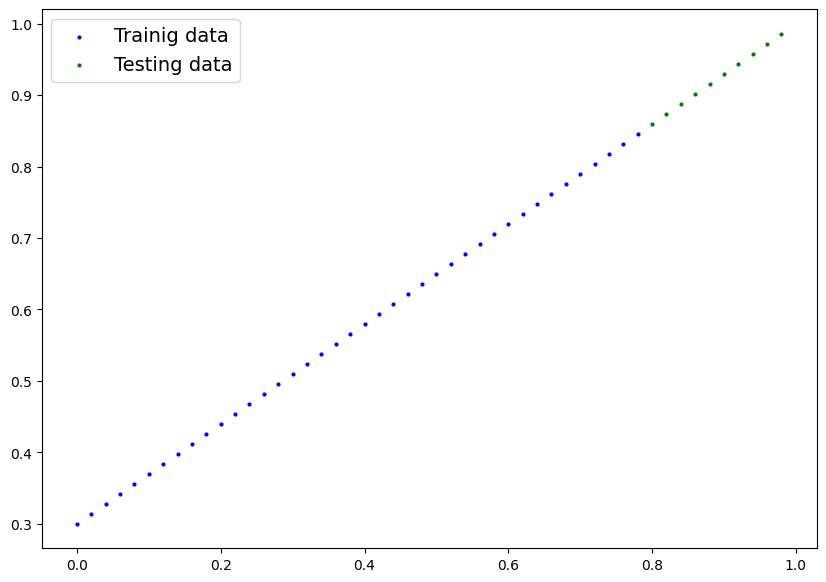

In [21]:
plot_predictions()

## 2. Build Model

In [103]:
from torch import  nn
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Mdoule
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                    requires_grad=True, 
                                    dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                    requires_grad=True,
                                    dtype=torch.float))
    # Forward method to define the compllation
    def forward(self, x:torch.Tensor) -> torch.Tensor:# <- "x" is the input data
        return self.weights* x + self.bias 
            


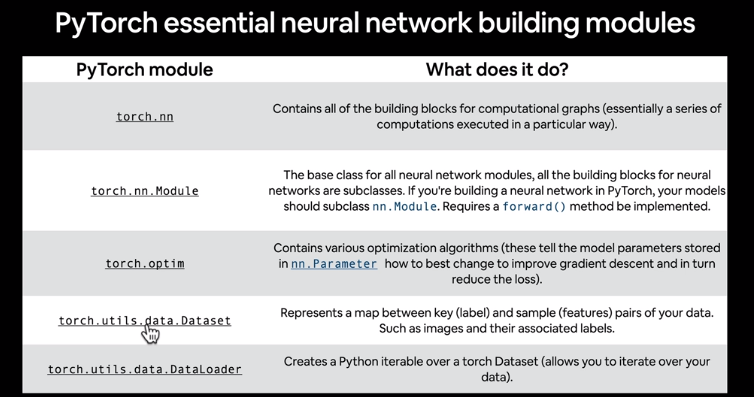

In [104]:
import torch
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [105]:
# Make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [106]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

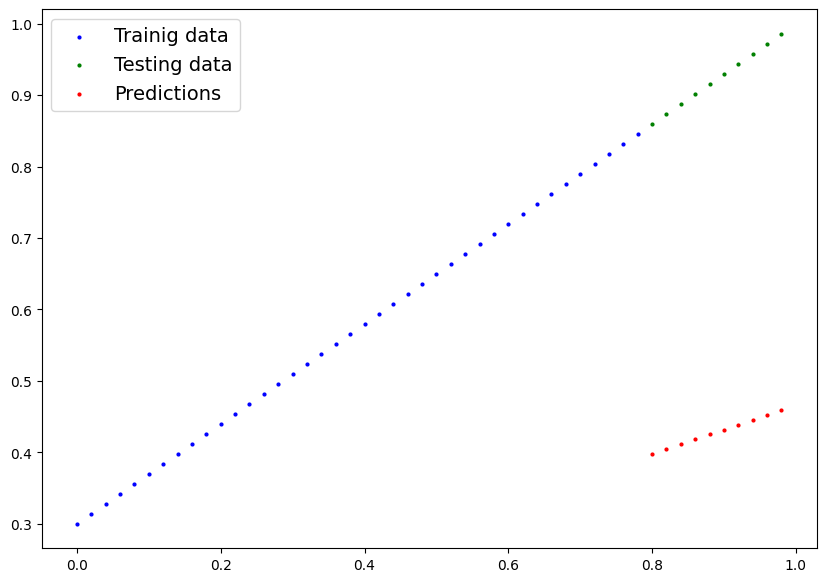

In [107]:
plot_predictions(predictions=y_preds)

> Note:  `torch.inference_mode()` it turns off the gradient descent. Same can be performed with the help of the `torch.no_grad()`

```python
    with torch.no_grad():
        y_preds = model_0(X_test)
```

However inference_mode is preferred

## 3. Train Model

The whole idea of training is for a model to move from somme unknown parameters (these may be random) to some known parammeters

Or in other words from a poor representation of the data to a better representation of the data
 
One way to measure how poor or how wrong your models predictions are is to use a loss function

> Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Things we need to train:

* Loss Function: A function to measure your models's prediction are to ideal ouputs, lower is better
* Optimizer:Takes into account the loss of a model and adjusts the model's  parameter(eg, weight & bias in our case) to improve the loss function

And specifically for Pytorch, we need:
* A training loop
* A testing loop


In [108]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [109]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [110]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer  =  torch.optim.SGD(params=model_0.parameters(),
                                lr=0.001)


### Building a training loop and testing loop in Pytorch

A couple of things we need in a training loop:

0. go through the data
1. forward pass (this involves data moving through model's `forward()` function) - also called forward propogation
2. Calculation the loss (copare forward pass predictions to group truth labels)
3. Optimizer zero grad
4. Loss backward
5. Optimizer step - use the optimizer  to adjust our model's parameters to try and improve our model

This is general How we train the model in pytorch

```python
# An Epoch is one loop through the data
epochs = 10

### Training
# 0. Loop through the data
    for epoch in range(epochs):
        # set the model to training mode
        model_0.train()

        # 1. Forward pass
        y_preds = model_0(X_train)

        # 2. Calculate the loss
        loss = loss_fn(y_preds, y_train)

        # Optimizer zero grad
        optimizer.zero_grad()

        # 4. Perform backpropogation on the loss with respect to the parameter of the model
        loss.backward()

        # 5. Perform backpropogation on thie los with respect to the parameter of the model
        optimizer.step()

        # model_0.eval() # turns off the graident tracking
```

In [111]:
# An Epoch is one loop through the data
epochs = 10000

### Training
# 0. Loop through the data
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # set the model to training mode
    model_0.train()
    epoch_count.append(epoch)
    # 1. Forward pass
    y_preds = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)
    # print(f"Loss: {loss}")
    loss_values.append(loss)
    # Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation on the loss with respect to the parameter of the model
    loss.backward()

    # 5. Perform backpropogation on thie los with respect to the parameter of the model
    optimizer.step()

    model_0.eval() # turns off the graident tracking
    with torch.inference_mode():
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        test_loss_values.append(test_loss)


    if epoch % 10==0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")



Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
Epoch: 10 | Loss: 0.3013603389263153 | Test Loss: 0.4797181189060211
Epoch: 20 | Loss: 0.28983938694000244 | Test Loss: 0.4662471413612366
Epoch: 30 | Loss: 0.2783183455467224 | Test Loss: 0.4527761936187744
Epoch: 40 | Loss: 0.26679736375808716 | Test Loss: 0.43930521607398987
Epoch: 50 | Loss: 0.2552763819694519 | Test Loss: 0.4258342385292053
Epoch: 60 | Loss: 0.24375538527965546 | Test Loss: 0.41236335039138794
Epoch: 70 | Loss: 0.232234388589859 | Test Loss: 0.398892343044281
Epoch: 80 | Loss: 0.22071340680122375 | Test Loss: 0.38542139530181885
Epoch: 90 | Loss: 0.2091923952102661 | Test Loss: 0.3719504475593567
Epoch: 100 | Loss: 0.19767141342163086 | Test Loss: 0.35847947001457214
Epoch: 110 | Loss: 0.18615040183067322 | Test Loss: 0.34500852227211
Epoch: 120 | Loss: 0.17462942004203796 | Test Loss: 0.33153754472732544
Epoch: 130 | Loss: 0.16310855746269226 | Test Loss: 0.3180667459964752
Epoch: 140 | Loss: 0.

Epoch: 240 | Loss: 0.06828799843788147 | Test Loss: 0.18992407619953156
Epoch: 250 | Loss: 0.06476505100727081 | Test Loss: 0.18208928406238556
Epoch: 260 | Loss: 0.06174134090542793 | Test Loss: 0.17478716373443604
Epoch: 270 | Loss: 0.05915876477956772 | Test Loss: 0.16802480816841125
Epoch: 280 | Loss: 0.0569603331387043 | Test Loss: 0.161748006939888
Epoch: 290 | Loss: 0.05514555424451828 | Test Loss: 0.15608695149421692
Epoch: 300 | Loss: 0.05357731133699417 | Test Loss: 0.15086300671100616
Epoch: 310 | Loss: 0.05218071490526199 | Test Loss: 0.14595307409763336
Epoch: 320 | Loss: 0.05105169489979744 | Test Loss: 0.1415499746799469
Epoch: 330 | Loss: 0.050030313432216644 | Test Loss: 0.1374681293964386
Epoch: 340 | Loss: 0.049160152673721313 | Test Loss: 0.13370750844478607
Epoch: 350 | Loss: 0.04836020991206169 | Test Loss: 0.13020753860473633
Epoch: 360 | Loss: 0.04769856110215187 | Test Loss: 0.12709848582744598
Epoch: 370 | Loss: 0.04703690856695175 | Test Loss: 0.1239893883466

Q: which loss function should I use:

A: this will be probelm specific. But with Experiencel you'll get an idea of what works and what doesn't your particular problem set
For example, for a regression problem (like our's), al loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will be sufficient.
But for a classification problem like classifying wheter a photo is of a cat or a dog, you'll likely want to use a loss function like nn.BCELoss (Binary cross Entropy loss)

In [112]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

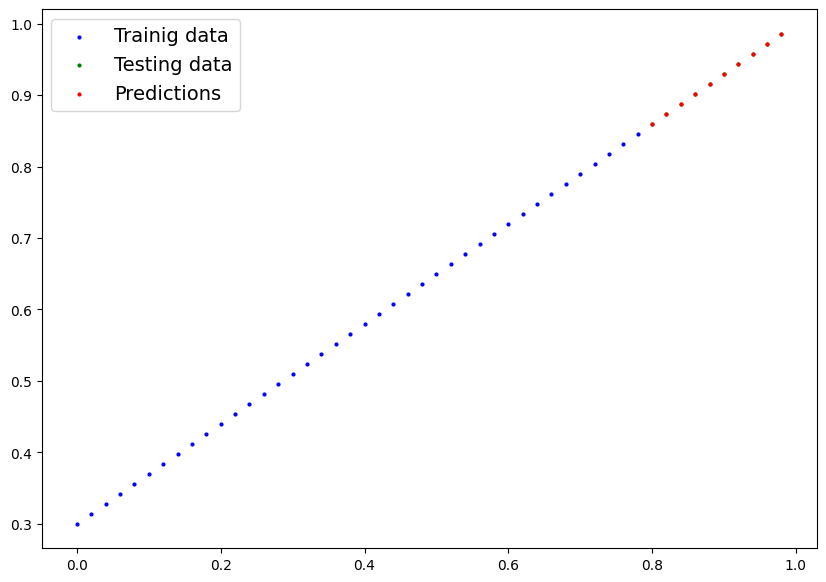

In [113]:
plot_predictions(predictions=y_preds_new)

In [114]:
epoch_count

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [115]:
test_loss

tensor(0.0008)

Text(0.5, 1.0, 'epoch count vs (loss values and test loss values)')

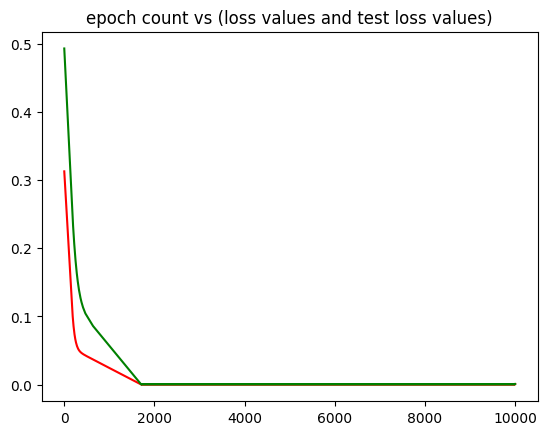

In [116]:
import numpy as np
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), c="red")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), c="green")
plt.title("epoch count vs (loss values and test loss values)")

### Saving a model in Pytorch

There  are three main methods you should about for saving and loading modals in Pytorch.

1. `torch.save()` - allows you save a Pytorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved Pytorch object
3.  `torch.nn.module.load_state_dict()`-  this allows to load a saved state dictionary

In [117]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [121]:
## saving our pytorch model
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_Pytorch_workflow_video_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the  model state dict

print(f"saving the model to:  {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


saving the model to:  models/01_Pytorch_workflow_video_model_0.pth


In [124]:
ls models/

01_Pytorch_workflow_video_model_0.pth


## Loading a Pytorch Model

Since we saved the `state_dict()` of our model, we'll create a new instance of our model class and load the `state_dict()`

In [126]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [127]:
# To load in teh saved state_dict we need ot instantiate a new instance our model class

loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this wil update the new instance wih update parameters)



In [128]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [129]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [130]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [131]:
with torch.inference_mode():
    loaded_model_0_y_preds = loaded_model_0(X_test)

In [135]:
y_preds

tensor([[0.3008],
        [0.3148],
        [0.3288],
        [0.3428],
        [0.3568],
        [0.3708],
        [0.3848],
        [0.3988],
        [0.4128],
        [0.4268],
        [0.4408],
        [0.4548],
        [0.4687],
        [0.4827],
        [0.4967],
        [0.5107],
        [0.5247],
        [0.5387],
        [0.5527],
        [0.5667],
        [0.5807],
        [0.5947],
        [0.6087],
        [0.6227],
        [0.6367],
        [0.6507],
        [0.6647],
        [0.6787],
        [0.6927],
        [0.7067],
        [0.7207],
        [0.7346],
        [0.7486],
        [0.7626],
        [0.7766],
        [0.7906],
        [0.8046],
        [0.8186],
        [0.8326],
        [0.8466]], grad_fn=<AddBackward0>)

In [136]:
y_preds_new == loaded_model_0_y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go  back through the steps aboe and see it all in one piece

In [137]:
# import Pytorch  and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

Create  device-agnostic code.

This measn if we've got access to a GPU, our code will use it ( for potentially  faster computing)

if no GPU is available, the code will default to using CPU.

In [139]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [140]:
!nvidia-smi

Thu Mar 14 18:30:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1050        Off | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8              N/A / ERR! |      8MiB /  3072MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data